# Introduction

This dataset has been generated using BankSim, a bank simulator for a Spanish bank.

## Data generation method

BankSim was run for 180 steps (approx. six months), several times and calibrated the parameters in order to obtain a distribution that get close enough to be reliable for testing. There were collected several log files and selected the most accurate. There were injected thieves that aim to steal an average of three cards per step and perform about two fraudulent transactions per day. Were produced 594643 records in total. Where 587443 are normal payments and 7200 fraudulent transactions. Since this is a randomised simulation the values are of course not identical to original data.




# Analysis preparation

## Load packages

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## Load the data

In [ ]:
data_red_df = pd.read_csv("/kaggle/input/banksim1/bsNET140513_032310.csv")
data_df = pd.read_csv("/kaggle/input/banksim1/bs140513_032310.csv")

## Glimpse the data

In [ ]:
print(data_red_df.shape)

(594643, 5)


In [ ]:
print(data_df.shape)

(594643, 10)


In [ ]:
data_df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
data_red_df.head()

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [ ]:
print(f"unique customers: {data_df.customer.nunique()}")
print(f"unique merchants: {data_df.merchant.nunique()}")
print(f"unique age: {data_df.age.nunique()}")
print(f"unique gender: {data_df.gender.nunique()}")
print(f"unique zipCode Origin: {data_df.zipcodeOri.nunique()}")
print(f"unique zipCode Merchant: {data_df.zipMerchant.nunique()}")
print(f"unique category: {data_df.category.nunique()}")
print(f"unique amount: {data_df.amount.nunique()}")
print(f"unique fraud: {data_df.fraud.nunique()}")

unique customers: 4112
unique merchants: 50
unique age: 8
unique gender: 4
unique zipCode Origin: 1
unique zipCode Merchant: 1
unique category: 15
unique amount: 23767
unique fraud: 2


In [ ]:
print(f"unique Source: {data_red_df.Source.nunique()}")
print(f"unique Target: {data_red_df.Target.nunique()}")
print(f"unique Weight: {data_red_df.Weight.nunique()}")
print(f"unique typeTrans: {data_red_df.typeTrans.nunique()}")
print(f"unique fraud: {data_red_df.fraud.nunique()}")

unique Source: 4112
unique Target: 50
unique Weight: 23767
unique typeTrans: 15
unique fraud: 2


# Data Exploration


We define few utility plot functions.  


We will explore all the features, as well as interaction between features.

In [ ]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(3*size,2*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set3')
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

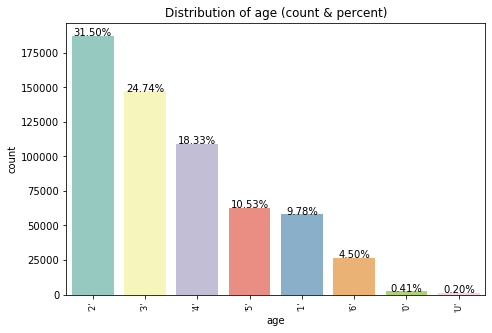

In [ ]:
plot_count(data_df, 'age', 'Distribution of age (count & percent)', size=2.5)

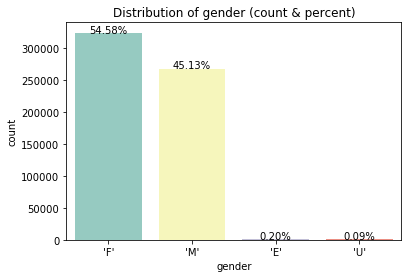

In [ ]:
plot_count(data_df, 'gender', 'Distribution of gender (count & percent)')

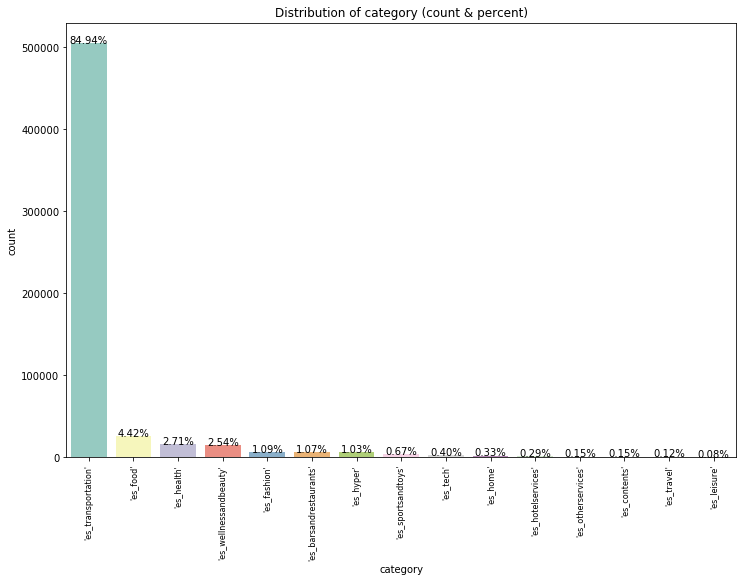

In [ ]:
plot_count(data_df, 'category', 'Distribution of category (count & percent)', size=4)

In [ ]:
temp = data_df["fraud"].value_counts()
df = pd.DataFrame({'fraud': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['fraud'],y = df['values'],
    name="Payments fraud - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Payments Fraud - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Fraud', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [ ]:
def plot_distplot_grouped(df, feature):
    classes = list(df[feature].unique())
    print(classes)
    group_labels = []     
    hist_data = []
    for item in classes:
        crt_class = df.loc[df[feature]==item]["step"]
        group_labels.append(f"{item}")
        hist_data.append(crt_class)
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
    fig['layout'].update(title=f'Payments Transactions Time Density Plot - grouped by `{feature}`', xaxis=dict(title='Time [step]'))
    iplot(fig, filename='dist_only')     

In [ ]:
plot_distplot_grouped(data_df, 'fraud')

[0, 1]


In [ ]:
plot_distplot_grouped(data_df, 'age')

["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"]


In [ ]:
plot_distplot_grouped(data_df, 'gender')

["'M'", "'F'", "'E'", "'U'"]


In [ ]:
plot_distplot_grouped(data_df, 'category')

["'es_transportation'", "'es_health'", "'es_otherservices'", "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'", "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'", "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'", "'es_travel'", "'es_leisure'"]


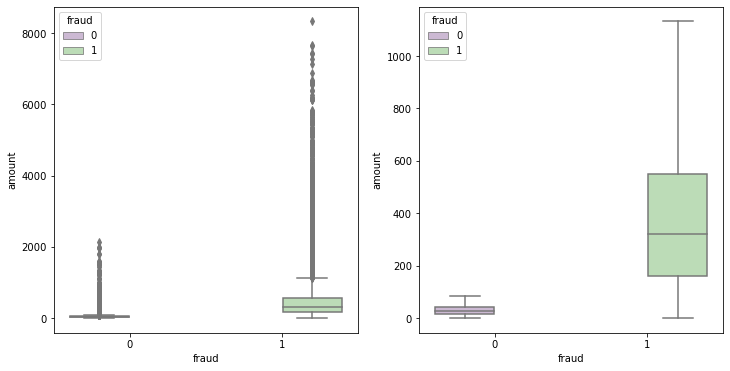

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="fraud", y="amount", hue="fraud",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="fraud", y="amount", hue="fraud",data=data_df, palette="PRGn",showfliers=False)
plt.show()

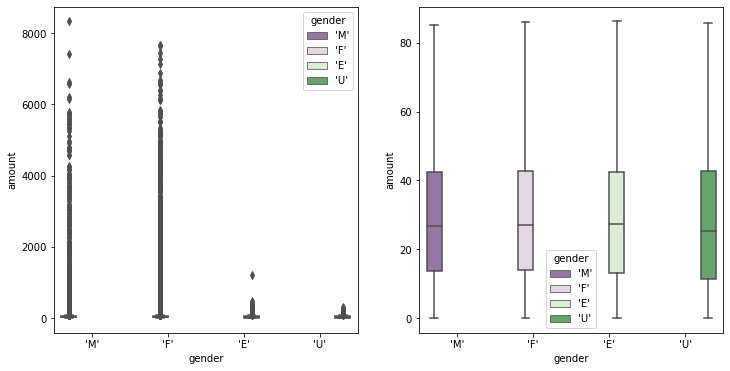

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="gender", y="amount", hue="gender",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="gender", y="amount", hue="gender",data=data_df, palette="PRGn",showfliers=False)
plt.show()

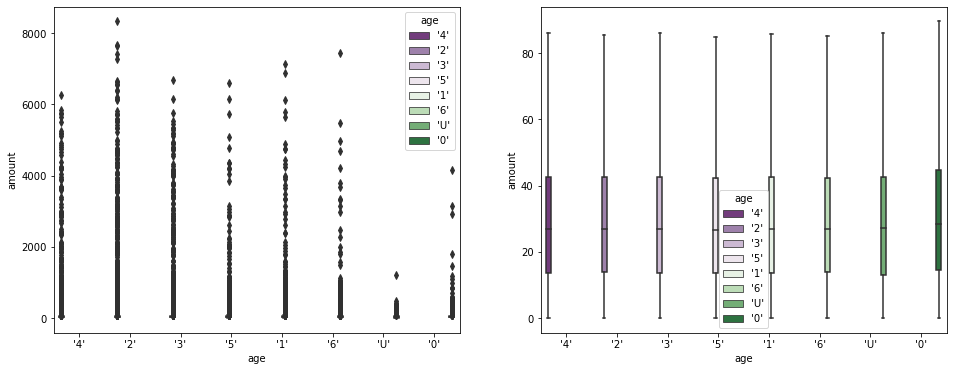

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="age", y="amount", hue="age",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="age", y="amount", hue="age",data=data_df, palette="PRGn",showfliers=False)
plt.show()

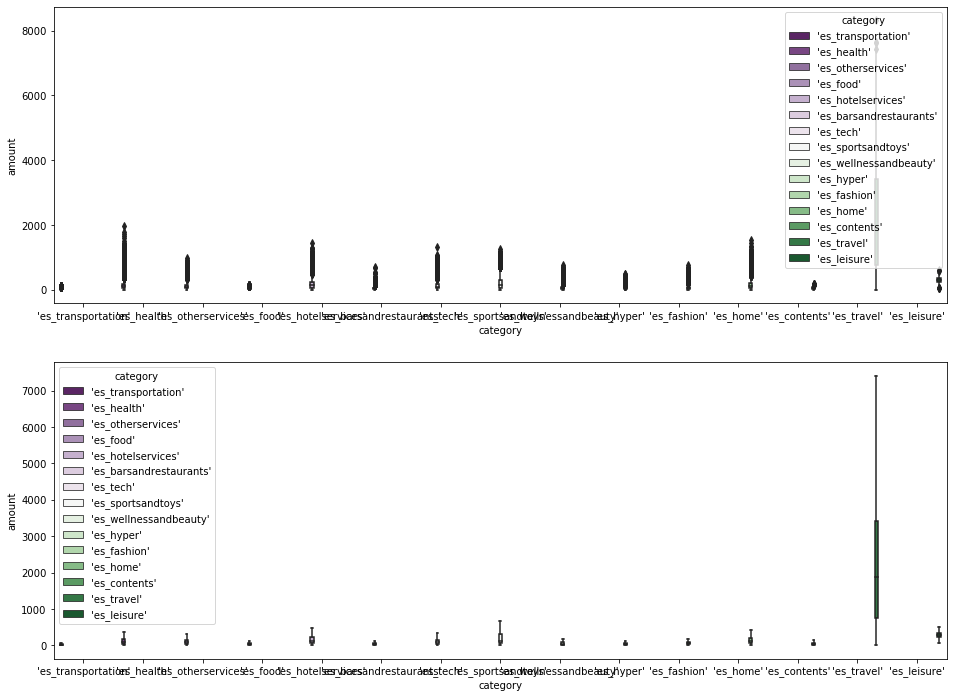

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="category", y="amount", hue="category",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="category", y="amount", hue="category",data=data_df, palette="PRGn",showfliers=False)
plt.show()

# Model

From the data, we will use 70% for training and 30% for validation.  

CatBoostClassifier (CatBoost) algorithm is used.  

ROC-AUC is the metric choosen.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

Prepare the features (X) and labels (y).

In [ ]:
X = data_df.drop(['fraud'], axis=1)
y = data_df.fraud

Perform train-validation split.

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

Specify the categorical features. CatBoost is very efficient in treatment of categorical features - no special processing (Label encoding, One-Hot encoding, Binary encoding) needed.


In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]


Initialize the algorithm, with few tuned hyperparameters.

In [ ]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 20,
                             od_wait=25)

Fit the training data.

In [ ]:
clf.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7913496	best: 0.7913496 (0)	total: 522ms	remaining: 4m 20s
20:	test: 0.9979805	best: 0.9979805 (20)	total: 19s	remaining: 7m 13s
40:	test: 0.9984946	best: 0.9984946 (40)	total: 43.7s	remaining: 8m 9s
60:	test: 0.9985981	best: 0.9985989 (59)	total: 1m 7s	remaining: 8m 6s
80:	test: 0.9987278	best: 0.9987278 (80)	total: 1m 31s	remaining: 7m 55s
100:	test: 0.9989098	best: 0.9989107 (98)	total: 1m 56s	remaining: 7m 41s
120:	test: 0.9989294	best: 0.9989294 (120)	total: 2m 19s	remaining: 7m 15s
140:	test: 0.9989534	best: 0.9989534 (140)	total: 2m 42s	remaining: 6m 53s
160:	test: 0.9989669	best: 0.9989669 (160)	total: 3m 8s	remaining: 6m 37s
180:	test: 0.9989776	best: 0.9989778 (179)	total: 3m 35s	remaining: 6m 20s
200:	test: 0.9989818	best: 0.9989831 (198)	total: 4m 1s	remaining: 5m 59s
220:	test: 0.9989898	best: 0.9989898 (220)	total: 4m 27s	remaining: 5m 38s
240:	test: 0.9990029	best: 0.9990029 (240)	total: 4m 54s	remaining: 5m 16s
260:	test: 0.9990163	best: 0.9990163 (260)	total

Perform prediction for validation data.

In [ ]:
preds = clf.predict(X_validation)

Show the confusion matrix.

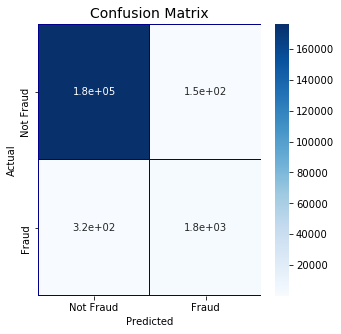

In [ ]:
cm = pd.crosstab(y_validation.values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Validation ROC-AUC.

In [ ]:
print(f"ROC-AUC score: {roc_auc_score(y_validation.values, preds)}")

ROC-AUC score: 0.9242377380179337
